### 1. Business and ML Objectives

- Data scientist tend to care about the ML Objectives: the metrics they can measure about the performance of their ML models.
- Many short-lived ML projects is that the data scientists become too focused on hacking ML metrics without paying attention to business metrics. Their managers, however, only care about business metrics and, after failing to see how an ML project can help push their business metrics, kill the projects prematurely (and possibly let go of the data science team involved).

**The sole purpose of business, is to maximize profits for shareholders.** The ultimate goal of any project within a business is to increase profits, either directly or indirectly. For an ML project to succeed within a business organization, it’s crucial to **tie the performance of an ML system to the overall business performance**.

Many companies create their **own metrics to map business metrics to ML metrics**. For example, Netflix measures the performance of their recommender system using *take-rate*: the number of quality plays divided by the number of recommendations a user sees.

To gain a definite answer on the question of how ML metrics influence business metrics, **experiments** are often needed. Many companies do that with experiments like **A/B testing** and choose the model that leads to better business metrics, regardless of whether this model has better ML metrics. **Yet, even rigorous experiments might not be sufficient to understand the relationship between an ML model’s outputs and business metrics**.

How long it takes for a company to bring a model to production is proportional to how long it has used ML:

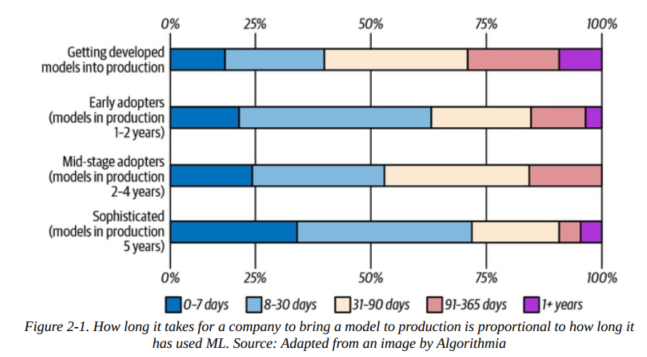

### 2. Requirements for ML Systems

#### 2.1 Reliability

**The system should continue to perform the correct function at the desired level of performance even in the face of adversity** (hardware or software faults, and even human error).

**“Correctness” might be difficult to determine for ML systems**. For example, your system might call the predict function—e.g., model.predict()—correctly, but the predictions are wrong. How do we know if a prediction is wrong if we don’t have ground truth labels to compare it with?

With traditional software systems, you often get a warning, such as a system crash or runtime error or 404. **However, ML systems can fail silently**. End users don’t even know that the system has failed and might have kept on using it as if it were working. For example, if you use Google Translate to translate a sentence into a language you don’t know, it might be very hard for you to tell even if the translation is wrong. We’ll discuss how ML systems fail in production in Chapter 8.

#### 2.2 Scalability

How an ML system can grow:
1. **Complexity**
    - e.g. Last year you used a logistic regression model that fit into an Amazon Web Services (AWS) free tier instance with 1 GB of RAM, but this year, you switched to a 100-million-parameter neural network that requires 16 GB of RAM to generate predictions.
2. **Traffic volume**
    - e.g. When you started deploying an ML system, you only served 10,000 prediction requests daily. However, as your company’s user base grows, the number of prediction requests your ML system serves daily fluctuates between 1 million and 10 million.
3. **Model count**
    - e.g. Initially, you might have only one model for one use case, such as detecting the trending hashtags on a social network site like Twitter. However, over time, you want to add more features to this use case, so you’ll add one more to filter out NSFW (not safe for work) content and another model to filter out tweets generated by bots. 
4. **Resource scaling**
    - consists of up-scaling (expanding the resources to handle growth) and down-scaling (reducing the resources when not needed).
    - e.g. For example, at peak, your system might require 100 GPUs (graphics processing units). However, most of the time, it needs only 10 GPUs. Keeping 100 GPUs up all the time can be costly, so your system should be able to scale down to 10 GPUs.
    - An indispensable feature in many cloud services is **autoscaling**: automatically scaling up and down the number of machines depending on usage. This feature can be tricky to implement. 
    - e.g. even Amazon fell victim to this when their autoscaling feature failed on Prime Day, causing their system to crash. An hour of downtime was estimated to cost Amazon between $72 million and $99 million.
5. **Artifact management**
    -  Managing one hundred models is very different from managing one model. With one model, you can, perhaps, manually monitor this model’s performance and manually update the model with new data. Since there’s only one model, you can just have a file that helps you reproduce this model whenever needed.
    - However, with one hundred models, both the monitoring and retraining aspect will need to be automated. You’ll need a way to manage the code generation so that you can adequately reproduce a model when you need to.



#### 2.3 Maintainability

There are many people who will work on an ML system. They are ML engineers, DevOps engineers, and subject matter experts (SMEs). They might come from very different backgrounds, with very different programming languages and tools, and might own different parts of the process.

**It’s important to structure your workloads and set up your infrastructure in such a way that different contributors can work using tools that they are comfortable with, instead of one group of contributors forcing their tools onto other groups**. 

1. Code should be documented. 
2. Code, data, and artifacts should be versioned. 
3. Models should be sufficiently reproducible so that even when the original authors are not around, other contributors can have sufficient contexts to build on their work. 
4. When a problem occurs, different contributors should be able to work together to identify the problem and implement a solution without fingerpointing.

#### 2.4 Adaptability

To adapt to **shifting data distributions and business requirements**, the system should have some capacity for both discovering aspects for **performance improvement and allowing updates without service interruption**.

Because ML systems are part code, part data, and data can change quickly, ML systems need to be able to evolve quickly. This is tightly linked to maintainability. We’ll discuss changing data distributions in the section “Data Distribution Shifts”, and how to continually update your model with new data in the section “Continual Learning”.

### 3. Iterative Process

e.g. Workflow of building an ML model to predict whether an ad should be shown when users enter a search query:
1. Choose a metric to optimize. For example, you might want to optimize for impressions—the number of times an ad is shown.
2. Collect data and obtain labels.
3. Engineer features.
4. Train models.
5. During error analysis, you realize that errors are caused by the wrong labels, so you relabel the data.
6. Train the model again.
7. During error analysis, you realize that your model always predicts that an ad shouldn’t be shown, and the reason is because 99.99% of the data you have have NEGATIVE labels (ads that shouldn’t be shown). So you have to collect more data of ads that should be shown.
8. Train the model again.
9. The model performs well on your existing test data, which is by now two months old. However, it performs poorly on the data from yesterday. Your model is now stale, so you need to update it on more recent data.
10. Train the model again.
11. Deploy the model.
12. The model seems to be performing well, but then the businesspeople come knocking on your door asking why the revenue is decreasing. It turns out the ads are being shown, but few people click on them. So you want to change your model to optimize for ad click-through rate instead.
13. Go to step 1.

Oversimplified representation of what the iterative process for developing ML systems in production looks like from the perspective of a data scientist or an ML engineer:

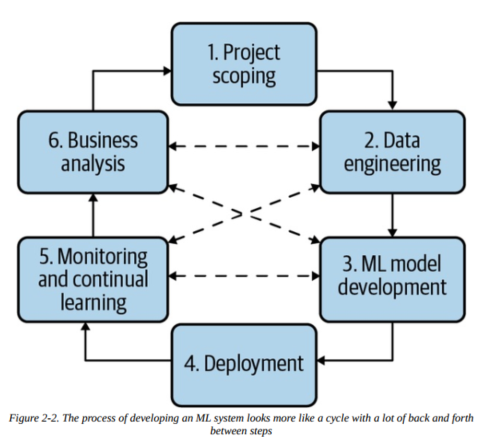

1. **Project scoping**
    - A project starts with scoping the project, laying out goals, objectives, and constraints. 
    - Stakeholders should be identified and involved. 
    - Resources should be estimated and allocated. 
2. **Data engineering**
    - Handling data from different sources and formats.
    - With access to raw data, we'll want to curate training data training data out of it by sampling and generating labels.
3. **ML model development**
    - With the initial set of training data, we’ll need to extract features and develop initial models leveraging these features. 
    - Feature engineeing.
    - Model selection, training, and evaluation.
4. **Deployment**
    - After a model is developed, it needs to be made accessible to users.
    - Developing an ML system is like writing—you will never reach the point when your system is done. But you do reach the point when you have to put your system out there.
5. **Monitoring and continual learning**
    - Once in production, models need to be monitored for performance decay and maintained to be adaptive to changing environments and changing requirements.
6. **Business analysis**
    - Model performance needs to be evaluated against business goals and analyzed to generate business insights. 
    - These insights can then be used to eliminate unproductive projects or scope out new projects. This step is closely related to the first step.

### 4. Framing ML Problems

#### 4.1 Types of ML Tasks

Common task types in ML: 

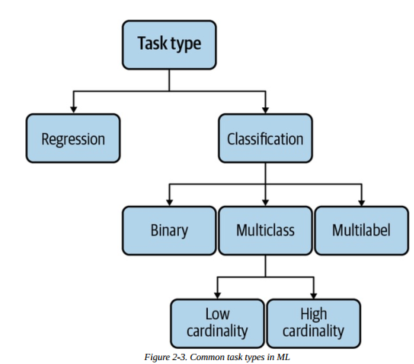

##### Classification vs Regression

1. **Classification models**: classify inputs into different categories. 
2. **Regression models**: output a continuous value.

**A regression model can easily be framed as a classification model and vice versa**. 
1. House prediction can become a classification task if we quantize the house prices into buckets such as under $100,000, $100,000– $200,000, $200,000–$500,000, and so forth and predict the bucket the house should be in.
2. The email classification model can become a regression model if we make it output values between 0 and 1, and decide on a threshold to determine which values should be SPAM (for example, if the value is above 0.5, the email is spam).

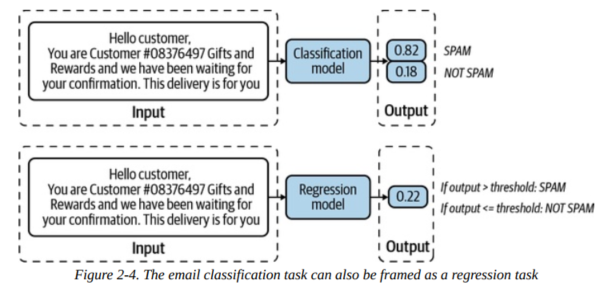

##### Binary vs Multiclass Classification

Within classification problems, **the fewer classes there are to classify, the simpler the problem is**. 

When the number of classes is high, we say the classification task has **high cardinality**.

Challenges of high cardinality: **Data collection**
- ML models typically need at least 100 examples for each class to learn to classify that class. So if you have 1,000 classes, you already need at least 100,000 examples. 
- The data collection can be especially difficult for rare classes.

When the number of classes is large, **hierarchical classification** might be useful. In hierarchical classification, you have a classifier to first classify each example
into one of the large groups. Then you have another classifier to classify this example into one of the subgroups. 

##### Multiclass vs Multilabel Classification

In both binary and multiclass classification, each example belongs to exactly one class. When an example can belong to multiple classes, we have a **multilabel classification** problem. 

Approaches to multilabel classification:
1. Treat it as you would a multiclass classification
    - In multiclass classification, if there are four possible classes [tech, entertainment, finance, politics] and the label for an example is entertainment, you represent this label with the vector [0, 1, 0, 0]. 
    - In multilabel classification, if an example has both labels entertainment and finance, its label will be represented as [0, 1, 1, 0].
2. Turn it into a set of binary clasification problems
    - For the article classification problem, you can have four models corresponding to four topics, each model outputting whether an article is in that topic or not.

Problems of multilabel classification:
1. Makes it difficult for label annotation since it increases the label multiplicity problem
    - e.g. an annotator might believe an example belongs to two classes while another annotator might believe the same example to belong in only one class, and it might be difficult resolving their disagreements.
2. Varying number of classes makes it hard to extract predictions from raw probability

##### Multiple ways to frame a problem

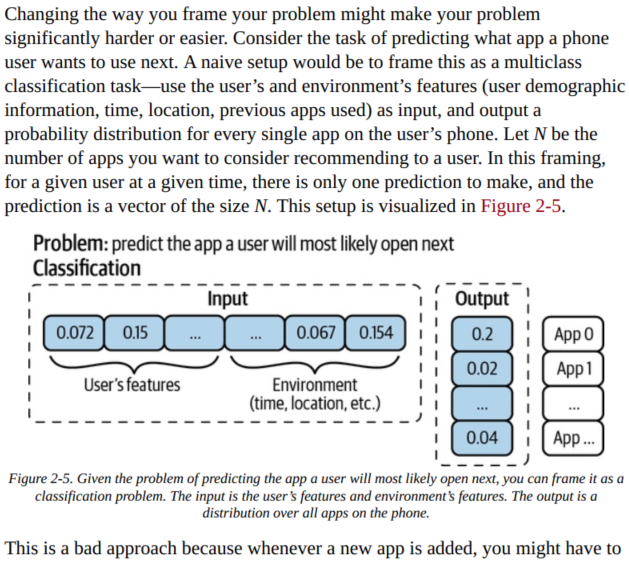

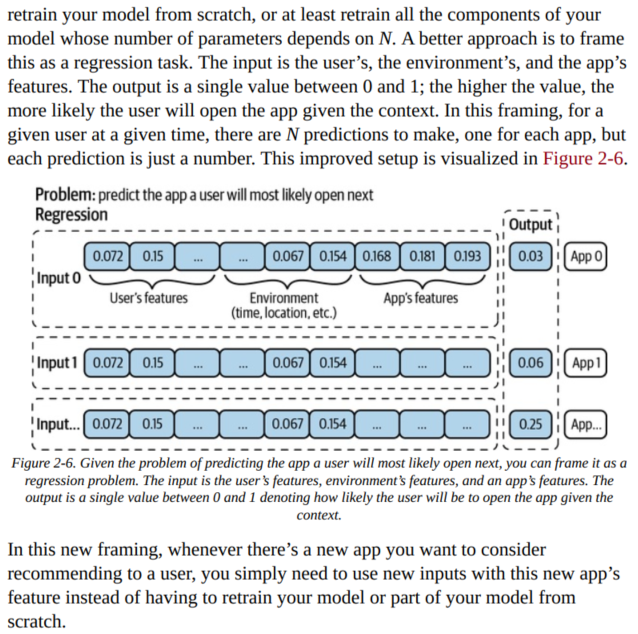

#### 4.2 Objective Functions

- To learn, an ML model needs an objective function to guide the learning process.
- An objective function is also called a loss function

##### Decoupling objectives

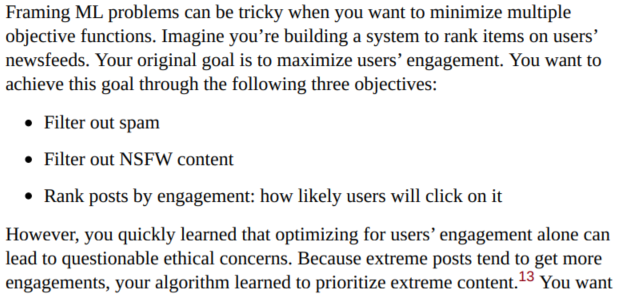

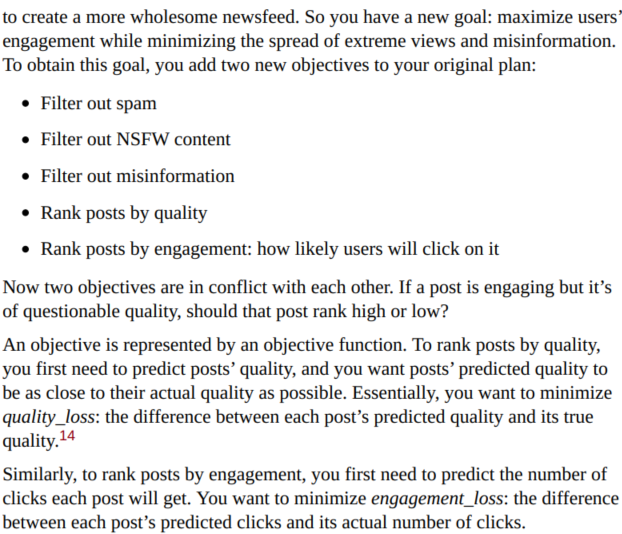

**Approach 1:** Combine these two losses into one loss and train one model to minimize the loss

$$loss = \alpha \cdot \text{quality\_loss} + \beta \cdot \text{engagement\_loss}$$

You can randomly test out different values of $\alpha$ and $\beta$ to find the values that work best. If you want to be more systematic about tuning these values, you can check
out **Pareto optimization**, “an area of multiple criteria decision making that is concerned with mathematical optimization problems involving more than one objective function to be optimized simultaneously.

A problem with this approach is that each time you tune $\alpha$ and $\beta$—for example, if the quality of your users’ newsfeeds goes up but users’ engagement goes down, you might want to decrease $\alpha$ and increase $\beta$—you’ll have to **retrain your model**.

**Approach 2:** Train two different models, each optimizing one loss 

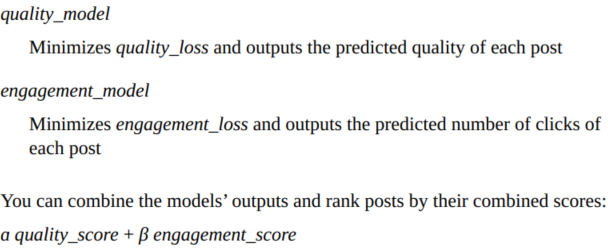

Now you can tweak $\alpha$ and $\beta$ without retraining your models.

### 5. Mind Versus Data

Progress in the last decade shows that **the success of an ML system depends largely on the data it was trained on**. Instead of focusing on improving ML algorithms, most companies focus on managing and improving their data.

There were always some public debates about the power of mind versus data: 
1. **Mind**: might be disguised as inductive biases or intelligent architectural designs
2. **Data**: might be grouped together with computation since more data tends to require more computation

The data science hierachy of needs: 

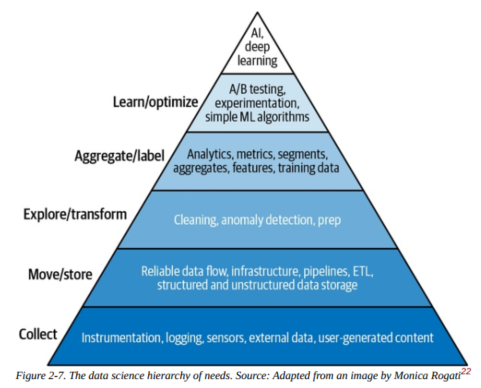